## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

pd.set_option("display.max_columns", 50)
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_pitching = pd.read_csv("Pitching.csv")
raw_pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [3]:
raw_pitching.drop([42108], inplace = True)

In [4]:
raw_pitching.iloc[42108]

playerID    gonzaed01
yearID           2013
stint               1
teamID            TOR
lgID               AL
W                   0
L                   0
G                   3
GS                  0
CG                  0
SHO                 0
SV                  0
IPouts             24
H                   9
ER                  7
HR                  2
BB                  5
SO                  3
BAOpp           0.281
ERA              7.88
IBB                 0
WP                  0
HBP                 1
BK                  0
BFP                38
GF                  1
R                   7
SH                  0
SF                  0
GIDP                0
Name: 42109, dtype: object

In [5]:
pitching = raw_pitching[(raw_pitching.yearID >= 2008) & (raw_pitching.yearID <= 2019)]

display(pitching.head())

print(pitching.shape)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
38320,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
38321,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0
38322,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0
38323,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0
38324,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0


(9307, 30)


In [6]:
null_vals = pitching.isna().sum()
print("Percent of missing data: \n\n", null_vals / len(pitching))

Percent of missing data: 

 playerID    0.000000
yearID      0.000000
stint       0.000000
teamID      0.000000
lgID        0.000000
W           0.000000
L           0.000000
G           0.000000
GS          0.000000
CG          0.000000
SHO         0.000000
SV          0.000000
IPouts      0.000000
H           0.000000
ER          0.000000
HR          0.000000
BB          0.000000
SO          0.000000
BAOpp       0.000645
ERA         0.001289
IBB         0.000000
WP          0.000000
HBP         0.000000
BK          0.000000
BFP         0.000000
GF          0.000000
R           0.000000
SH          0.000000
SF          0.000000
GIDP        0.000000
dtype: float64


In [7]:
pitching.dropna(inplace = True)

In [8]:
pitching.isna().sum()

playerID    0
yearID      0
stint       0
teamID      0
lgID        0
W           0
L           0
G           0
GS          0
CG          0
SHO         0
SV          0
IPouts      0
H           0
ER          0
HR          0
BB          0
SO          0
BAOpp       0
ERA         0
IBB         0
WP          0
HBP         0
BK          0
BFP         0
GF          0
R           0
SH          0
SF          0
GIDP        0
dtype: int64

In [9]:
pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000
mean,2013.816979,1.090273,3.136862,3.136647,25.477943,6.273940,0.142995,0.064665,1.591887,168.162363,54.627824,25.662040,6.654508,19.762105,48.031849,0.266253,5.348883,1.348074,2.193781,2.148483,0.194857,239.252206,6.130514,27.781149,1.649021,1.616419,4.740585
std,3.488551,0.300876,4.033033,3.557350,20.792382,10.398705,0.587813,0.315007,6.193472,170.748939,55.362188,25.337357,7.145546,18.543178,50.462570,0.080850,6.163295,1.691821,2.639908,2.607200,0.511581,238.182038,10.150894,27.378007,2.332177,1.931896,5.493464
min,2008.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,39.000000,14.000000,7.000000,2.000000,6.000000,10.000000,0.228000,3.180000,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000,8.000000,0.000000,0.000000,1.000000
50%,2014.000000,1.000000,2.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,113.000000,36.000000,17.000000,4.000000,14.000000,31.000000,0.259000,4.260000,1.000000,1.000000,1.000000,0.000000,163.000000,2.000000,19.000000,1.000000,1.000000,3.000000
75%,2017.000000,1.000000,4.000000,5.000000,34.000000,9.000000,0.000000,0.000000,0.000000,215.000000,69.000000,34.000000,9.000000,28.000000,68.000000,0.295000,5.800000,2.000000,3.000000,3.000000,0.000000,303.000000,8.000000,36.000000,2.000000,2.000000,7.000000
max,2019.000000,5.000000,24.000000,19.000000,92.000000,35.000000,11.000000,6.000000,62.000000,753.000000,262.000000,119.000000,46.000000,105.000000,326.000000,1.000000,162.000000,13.000000,25.000000,19.000000,6.000000,1001.000000,71.000000,128.000000,19.000000,14.000000,36.000000


In [10]:
pitch_data = pitching.copy()
pitch_data.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
38320,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
38321,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0
38322,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0
38323,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0
38324,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0


In [11]:
pitch_data.reset_index(drop = True, inplace = True)
pitch_data.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0


In [12]:
players = pd.read_csv("People.csv")
players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [13]:
players["fullName"] = players["nameFirst"] + " " + players["nameLast"]
players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,David Aardsma
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,Hank Aaron
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,Tommie Aaron
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,Don Aase
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,Andy Abad


In [14]:
pitch_data_2 = pd.merge(pitch_data, players, on='playerID', how='left')
pitch_data_2.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,...,GIDP,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,...,4.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,David Aardsma
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,...,3.0,1981.0,12.0,18.0,USA,AZ,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,Jeremy,Accardo,Jeremiah Lee,195.0,72.0,R,R,2005-05-04,2012-09-27,accaj001,accarje01,Jeremy Accardo
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,...,3.0,1982.0,12.0,8.0,Mexico,Sonora,San Luis Rio Colorado,NaN,NaN,NaN,NaN,NaN,NaN,Alfredo,Aceves,Alfredo,205.0,74.0,R,R,2008-08-31,2014-06-02,aceva001,aceveal01,Alfredo Aceves
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,...,7.0,1981.0,5.0,1.0,Panama,Colon,Colon,NaN,NaN,NaN,NaN,NaN,NaN,Manny,Acosta,Manuel Alcides,215.0,76.0,R,R,2007-08-12,2012-10-03,acosm001,acostma01,Manny Acosta
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,...,2.0,1978.0,7.0,29.0,USA,TX,Corpus Christi,NaN,NaN,NaN,NaN,NaN,NaN,Mike,Adams,Jon Michael,210.0,77.0,R,R,2004-05-18,2014-09-18,adamm001,adamsmi03,Mike Adams


In [15]:
pitch_data_3 = pitch_data_2.drop(pitch_data_2.iloc[:, 30:45], axis = 1)
pitch_data_3.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,David Aardsma
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0,195.0,72.0,R,R,2005-05-04,2012-09-27,accaj001,accarje01,Jeremy Accardo
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0,205.0,74.0,R,R,2008-08-31,2014-06-02,aceva001,aceveal01,Alfredo Aceves
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0,215.0,76.0,R,R,2007-08-12,2012-10-03,acosm001,acostma01,Manny Acosta
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0,210.0,77.0,R,R,2004-05-18,2014-09-18,adamm001,adamsmi03,Mike Adams


In [16]:
cols = ["BAOpp", "IBB", "WP", "HBP", "BK", "BFP", "SH", "SF", "GIDP", "bats",
        "debut", "finalGame", "retroID", "bbrefID"]
pitch_data_3.drop(columns = cols, axis = 1, inplace = True)
pitch_data_3.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams


In [17]:
pitch_data_3["IP"] = pitch_data_3.apply(lambda row: round(row.IPouts / 3, 2), axis = 1)
pitch_data_3.head(20)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams,65.33
5,adenhni01,2008,1,LAA,AL,1,0,3,3,0,0,0,36,18,12,0,13,4,9.00,0,12,185.0,75.0,R,Nick Adenhart,12.00
6,adkinjo01,2008,1,CIN,NL,1,0,4,0,0,0,0,11,4,1,1,3,3,2.45,0,1,200.0,72.0,R,Jon Adkins,3.67
7,affelje01,2008,1,CIN,NL,1,1,74,0,0,0,0,235,78,29,9,25,80,3.33,20,36,225.0,76.0,L,Jeremy Affeldt,78.33
8,albaljo01,2008,1,NYA,AL,0,1,7,0,0,0,0,41,15,6,1,6,13,3.95,2,6,270.0,77.0,R,Jonathan Albaladejo,13.67
9,alberma01,2008,1,BAL,AL,3,3,28,3,0,0,0,147,43,19,4,22,26,3.49,5,21,225.0,73.0,R,Matt Albers,49.00


In [18]:
pitch_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9294 entries, 0 to 9293
Data columns (total 26 columns):
playerID    9294 non-null object
yearID      9294 non-null int64
stint       9294 non-null int64
teamID      9294 non-null object
lgID        9294 non-null object
W           9294 non-null int64
L           9294 non-null int64
G           9294 non-null int64
GS          9294 non-null int64
CG          9294 non-null int64
SHO         9294 non-null int64
SV          9294 non-null int64
IPouts      9294 non-null int64
H           9294 non-null int64
ER          9294 non-null int64
HR          9294 non-null int64
BB          9294 non-null int64
SO          9294 non-null int64
ERA         9294 non-null float64
GF          9294 non-null int64
R           9294 non-null int64
weight      9294 non-null float64
height      9294 non-null float64
throws      9294 non-null object
fullName    9294 non-null object
IP          9294 non-null float64
dtypes: float64(4), int64(17), object(5)
memory 

In [19]:
IP_lessThan_1 = pitch_data_3.loc[pitch_data_3.IP <= 1]
IP_lessThan_1.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
89,burkeja02,2008,1,SEA,AL,0,1,1,0,0,0,0,3,1,1,0,0,0,9.0,1,1,195.0,72.0,R,Jamie Burke,1.0
110,carpean01,2008,1,PHI,NL,0,0,1,0,0,0,0,3,1,0,0,1,1,0.0,1,0,240.0,75.0,R,Drew Carpenter,1.0
156,diazjo01,2008,1,TEX,AL,0,0,1,0,0,0,0,3,1,0,0,1,2,0.0,1,1,230.0,72.0,R,Jose Diaz,1.0
407,milesaa01,2008,1,SLN,NL,0,0,1,0,0,0,0,3,0,0,0,0,0,0.0,1,0,180.0,68.0,R,Aaron Miles,1.0
418,morilju01,2008,1,COL,NL,0,0,1,0,0,0,0,3,1,0,0,0,0,0.0,1,0,190.0,73.0,R,Juan Morillo,1.0


In [20]:
pitch_data_3.drop(IP_lessThan_1.index, inplace = True)
pitch_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8975 entries, 0 to 9292
Data columns (total 26 columns):
playerID    8975 non-null object
yearID      8975 non-null int64
stint       8975 non-null int64
teamID      8975 non-null object
lgID        8975 non-null object
W           8975 non-null int64
L           8975 non-null int64
G           8975 non-null int64
GS          8975 non-null int64
CG          8975 non-null int64
SHO         8975 non-null int64
SV          8975 non-null int64
IPouts      8975 non-null int64
H           8975 non-null int64
ER          8975 non-null int64
HR          8975 non-null int64
BB          8975 non-null int64
SO          8975 non-null int64
ERA         8975 non-null float64
GF          8975 non-null int64
R           8975 non-null int64
weight      8975 non-null float64
height      8975 non-null float64
throws      8975 non-null object
fullName    8975 non-null object
IP          8975 non-null float64
dtypes: float64(4), int64(17), object(5)
memory 

In [21]:
multi_stint_df = pitch_data_3[pitch_data_3["stint"] == 2]
multi_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
12,ariasal02,2008,2,HOU,NL,1,1,3,2,0,0,0,24,11,6,0,6,8,6.75,0,6,155.0,71.0,R,Alberto Arias,8.00
18,ayalalu01,2008,2,NYN,NL,1,2,19,0,0,0,9,54,23,11,3,2,14,5.50,13,12,205.0,74.0,R,Luis Ayala,18.00
22,baekch01,2008,2,SDN,NL,6,9,22,20,0,0,0,333,118,57,12,30,77,4.62,0,60,190.0,76.0,R,Cha-Seung Baek,111.00
32,bassbr01,2008,2,BAL,AL,1,0,5,4,0,0,0,63,14,11,1,9,13,4.71,0,13,215.0,74.0,R,Brian Bass,21.00
36,bautide01,2008,2,PIT,NL,4,3,35,0,0,0,0,124,46,28,5,28,34,6.10,5,28,190.0,77.0,R,Denny Bautista,41.33


In [22]:
single_stint_df = pitch_data_3[pitch_data_3["stint"] == 1]
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams,65.33


In [23]:
single_stint_df.reset_index(drop = True, inplace= True)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams,65.33


In [24]:
multi_stint_df.reset_index(drop = True, inplace = True) 
multi_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,ariasal02,2008,2,HOU,NL,1,1,3,2,0,0,0,24,11,6,0,6,8,6.75,0,6,155.0,71.0,R,Alberto Arias,8.00
1,ayalalu01,2008,2,NYN,NL,1,2,19,0,0,0,9,54,23,11,3,2,14,5.50,13,12,205.0,74.0,R,Luis Ayala,18.00
2,baekch01,2008,2,SDN,NL,6,9,22,20,0,0,0,333,118,57,12,30,77,4.62,0,60,190.0,76.0,R,Cha-Seung Baek,111.00
3,bassbr01,2008,2,BAL,AL,1,0,5,4,0,0,0,63,14,11,1,9,13,4.71,0,13,215.0,74.0,R,Brian Bass,21.00
4,bautide01,2008,2,PIT,NL,4,3,35,0,0,0,0,124,46,28,5,28,34,6.10,5,28,190.0,77.0,R,Denny Bautista,41.33


In [25]:
single_stint_df.loc[single_stint_df.playerID == "burawda01"]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP


In [26]:
multi_stint_df.loc[multi_stint_df.playerID == "rasmuro01"]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
404,rasmuro01,2015,2,SEA,AL,2,1,19,0,0,0,0,43,25,17,2,8,16,10.67,5,18,175.0,70.0,L,Rob Rasmussen,14.33


In [27]:
multi_stint_df.iloc[471]

playerID       parkebl01
yearID              2016
stint                  2
teamID               NYA
lgID                  AL
W                      1
L                      0
G                     16
GS                     0
CG                     0
SHO                    0
SV                     1
IPouts                49
H                     16
ER                     9
HR                     1
BB                     8
SO                    15
ERA                 4.96
GF                     5
R                      9
weight               225
height                75
throws                 R
fullName    Blake Parker
IP                 16.33
Name: 471, dtype: object

In [28]:
stint_drop_idx = [46, 202, 223, 311, 324, 349, 391, 404, 408, 471,
                  536, 558, 566, 574, 579, 653, 660]

In [29]:
multi_stint_df = multi_stint_df.drop(stint_drop_idx)

In [30]:
# This is a dataframe with every player from 2008 - 2019, with their cumulative stats. Might be good for later use.

# df = pd.concat([single_stint_df, multi_stint_df]).groupby(["playerID"])["W", "L"
#                                                                       , "G", "GS",
#                                                                       "CG", "SHO",
#                                                                       "SV", "IPouts",
#                                                                       "H", "ER", "HR",
#                                                                       "BB", "SO", "GF",
#                                                                       "R", "IP"].sum().reset_index()
# df

In [60]:
for _,row in multi_stint_df.iterrows():
    s = single_stint_df.loc[(single_stint_df.playerID == row.playerID) & (single_stint_df.yearID == row.yearID)]
    #if row.playerID == s.playerID & s.yearID == row.yearID:
    #print("hello")
        #single_stint_df_row = single_stint_df.loc[(single_stint_df.playerID == row.playerID) & (single_stint_df.yearID == row.yearID)]
#print("Multi Stint ID: ", row.playerID)
#print("Single Stint ID: ", s.index)
    idx = s.index.values.astype('int')[0]
    val = single_stint_df.iloc[idx].IP + row.IP
    single_stint_df.iloc[idx, single_stint_df.columns.get_loc('IP')] = val

In [61]:
single_stint_df.loc[single_stint_df.playerID == "ayalalu01"]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
16,ayalalu01,2008,1,WAS,NL,2,10,81,0,0,0,9,173,86,48,9,24,50,5.77,25,53,205.0,74.0,R,Luis Ayala,75.67
660,ayalalu01,2009,1,MIN,AL,1,5,38,0,0,0,0,97,50,25,5,14,28,4.18,13,28,205.0,74.0,R,Luis Ayala,40.00
1930,ayalalu01,2011,1,NYA,AL,2,2,52,0,0,0,0,168,51,13,5,20,39,2.09,20,17,205.0,74.0,R,Luis Ayala,56.00
2583,ayalalu01,2012,1,BAL,AL,5,5,66,0,0,0,1,225,81,22,7,14,51,2.64,15,27,205.0,74.0,R,Luis Ayala,75.00
3222,ayalalu01,2013,1,BAL,AL,2,1,39,0,0,0,0,6,38,12,2,13,22,9.00,7,12,205.0,74.0,R,Luis Ayala,33.00


In [62]:
# Drop ERA in order to recalculate for true ERA.
# Drop IPouts, no longer needed
single_stint_df.drop(columns = ["ERA", "IPouts"], inplace = True)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33


In [63]:
# Calculation of "ERA"(estimated runs allowed). Statistic used to measure how well a
# pitcher keeps the other team from scoring. The lower the better.

# Formula: 9 innings * "ER"(Earned Runs) / "IP"(innings pitched)
single_stint_df["ERA"] = single_stint_df.apply(lambda row: round((9 * row.ER) / row.IP, 2), axis = 1)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48


In [64]:
# Calculation of WHIP stat. Used as an evaluative statistic on how well a 
# pitcher keeps runners off the bases. Less is better.

# Formula "BB"(walks) + "H"(hits) / "IP"(innings pitched)
single_stint_df["WHIP"] = single_stint_df.apply(lambda row: round((row.BB + row.H) / row.IP, 2), axis = 1)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04


In [65]:
# Labeling data, classifying the pitchers into three classes: 1 = Great, 2 = Average, 3 = Bad
for label, row in single_stint_df.iterrows():
    if row.WHIP < 1.25:
        single_stint_df.loc[label, "CLASS"] = 1
    if (row.WHIP >= 1.25) & (row.WHIP <= 1.39):
        single_stint_df.loc[label, "CLASS"] = 2
    elif row.WHIP >= 1.40:
        single_stint_df.loc[label, "CLASS"] = 3
        

In [66]:
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73,3.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40,3.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04,1.0


In [67]:
single_stint_df["CLASS"].value_counts(normalize = True)

3.0    0.478585
1.0    0.301769
2.0    0.219646
Name: CLASS, dtype: float64

In [68]:
single_stint_df.to_csv("single_stint_df.csv", index = False)

In [121]:
# pitch_data_with_names[pitch_data_with_names.stint.isin(stint_count.index[stint_count.gt(2)])]

In [122]:
# pitch_data_2.groupby("stint").filter(lambda x: len(x) > 2)

In [123]:
# pitch_data_with_names[pitch_data_with_names.stint.isin(stint_count[stint_count > 2].index)]

In [260]:
hi_whip = single_stint_df[single_stint_df.WHIP >= 3]
display(hi_whip.head())
print("Percent of Data: ", hi_whip.shape[0] / len(single_stint_df.index))


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
32,bazaryo01,2008,1,DET,AL,0,0,3,0,0,0,0,7,8,0,5,3,3,8,230.0,74.0,R,Yorman Bazardo,3.00,24.00,4.00,3.0
140,desalma01,2008,1,ATL,NL,0,0,2,0,0,0,0,11,7,0,2,2,0,7,180.0,72.0,R,Matt DeSalvo,2.00,31.50,6.50,3.0
141,desseel01,2008,1,ATL,NL,0,1,4,0,0,0,0,10,10,1,4,2,1,10,200.0,71.0,R,Elmer Dessens,4.00,22.50,3.50,3.0
184,fukumka01,2008,1,TEX,AL,0,0,4,0,0,0,0,11,9,2,4,1,0,9,175.0,72.0,R,Kazuo Fukumori,4.00,20.25,3.75,3.0
225,haegech01,2008,1,SDN,NL,0,0,4,0,0,0,0,8,8,2,5,4,1,10,210.0,73.0,R,Charlie Haeger,4.33,16.63,3.00,3.0


Percent of Data:  0.021110433190970102


In [261]:
lo_whip = single_stint_df[single_stint_df.WHIP <= .90]

display(lo_whip.head())
print("Percent of Data: ", lo_whip.shape[0] / len(single_stint_df.index))

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
24,balfogr01,2008,1,TBA,AL,6,2,51,0,0,0,4,28,10,3,24,82,12,10,200.0,74.0,R,Grant Balfour,58.33,1.54,0.89,1.0
112,cokeph01,2008,1,NYA,AL,1,0,12,0,0,0,0,8,1,0,2,14,0,1,210.0,73.0,L,Phil Coke,14.67,0.61,0.68,1.0
142,devinjo01,2008,1,OAK,AL,6,1,42,0,0,0,1,23,3,0,15,49,10,7,235.0,72.0,R,Joey Devine,45.67,0.59,0.83,1.0
256,hinckmi01,2008,1,WAS,NL,0,0,14,0,0,0,0,8,0,0,3,9,2,1,195.0,75.0,L,Mike Hinckley,13.67,0.00,0.80,1.0
293,kinnejo01,2008,1,SLN,NL,0,0,7,0,0,0,0,3,0,0,1,8,1,0,220.0,72.0,R,Josh Kinney,7.00,0.00,0.57,1.0


Percent of Data:  0.03685173886516169


In [265]:
lo_whip_idx = lo_whip.index.values
hi_whip_idx = hi_whip.index.values

In [266]:
single_stint_df.drop(lo_whip_idx, inplace = True)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73,3.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40,3.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04,1.0


In [267]:
single_stint_df.drop(hi_whip_idx, inplace = True)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73,3.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40,3.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04,1.0


In [269]:
single_stint_df.shape

(7720, 27)

In [268]:
single_stint_df.WHIP.value_counts(sort = True, ascending = True)

2.74      1
2.87      1
2.73      1
2.53      1
2.63      1
2.90      1
2.80      1
2.42      1
2.48      2
2.30      2
2.69      2
2.46      2
2.81      2
2.49      2
2.64      2
2.60      2
2.51      2
2.79      2
2.61      3
2.65      3
2.59      3
2.34      3
2.71      3
2.52      3
2.84      3
2.35      3
2.82      3
2.88      3
2.23      3
2.54      3
       ... 
1.18     93
1.15     95
1.16     95
1.42     96
1.19     99
1.34    101
1.39    103
1.25    104
1.43    106
1.23    106
1.21    110
1.20    111
1.35    111
1.44    111
1.24    112
1.41    114
1.30    115
1.28    116
1.32    116
1.31    118
1.22    119
1.36    120
1.27    121
1.40    122
1.37    128
1.38    128
1.29    130
1.26    130
1.33    159
1.50    178
Name: WHIP, Length: 194, dtype: int64

In [270]:
import seaborn as sns

In [271]:
sns.set_style("darkgrid")

In [272]:
kershaw_stats = single_stint_df.loc[single_stint_df.playerID == "kershcl01"].reset_index(drop = True)
kershaw_stats.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,kershcl01,2008,1,LAN,NL,5,5,22,21,0,0,0,109,51,11,52,100,0,51,226.0,76.0,L,Clayton Kershaw,107.67,4.26,1.50,3.0
1,kershcl01,2009,1,LAN,NL,8,8,31,30,0,0,0,119,53,7,91,185,1,55,226.0,76.0,L,Clayton Kershaw,171.00,2.79,1.23,1.0
2,kershcl01,2010,1,LAN,NL,13,10,32,32,1,1,0,160,66,13,81,212,0,73,226.0,76.0,L,Clayton Kershaw,204.33,2.91,1.18,1.0
3,kershcl01,2011,1,LAN,NL,21,5,33,33,5,2,0,174,59,15,54,248,0,66,226.0,76.0,L,Clayton Kershaw,233.33,2.28,0.98,1.0
4,kershcl01,2012,1,LAN,NL,14,9,33,33,2,2,0,170,64,16,63,229,0,70,226.0,76.0,L,Clayton Kershaw,227.67,2.53,1.02,1.0


In [241]:
# plt.figure(figsize = (16, 8))
# sns.swarmplot(x = "teamID", y = "SO", hue = "WHIP", data = best_teams, palette = "hot", size = 3);

In [273]:
teams = ["LAN", "MIL", "WAS", "NYA", "OAK", "MIN"]
best_teams = single_stint_df[single_stint_df["teamID"].isin(teams)].reset_index(drop = True)
best_teams.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
1,albaljo01,2008,1,NYA,AL,0,1,7,0,0,0,0,15,6,1,6,13,2,6,270.0,77.0,R,Jonathan Albaladejo,13.67,3.95,1.54,3.0
2,ayalalu01,2008,1,WAS,NL,2,10,81,0,0,0,9,86,48,9,24,50,25,53,205.0,74.0,R,Luis Ayala,75.67,5.71,1.45,3.0
3,bakersc02,2008,1,MIN,AL,11,4,28,28,0,0,0,161,66,20,42,141,0,66,215.0,76.0,R,Scott Baker,172.33,3.45,1.18,1.0
4,balesco01,2008,1,WAS,NL,3,7,15,15,0,0,0,92,49,12,28,50,0,53,190.0,76.0,R,Collin Balester,80.00,5.51,1.50,3.0


In [274]:
best_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 27 columns):
playerID    1495 non-null object
yearID      1495 non-null int64
stint       1495 non-null int64
teamID      1495 non-null object
lgID        1495 non-null object
W           1495 non-null int64
L           1495 non-null int64
G           1495 non-null int64
GS          1495 non-null int64
CG          1495 non-null int64
SHO         1495 non-null int64
SV          1495 non-null int64
H           1495 non-null int64
ER          1495 non-null int64
HR          1495 non-null int64
BB          1495 non-null int64
SO          1495 non-null int64
GF          1495 non-null int64
R           1495 non-null int64
weight      1495 non-null float64
height      1495 non-null float64
throws      1495 non-null object
fullName    1495 non-null object
IP          1495 non-null float64
ERA         1495 non-null float64
WHIP        1495 non-null float64
CLASS       1495 non-null float64
dtypes: floa

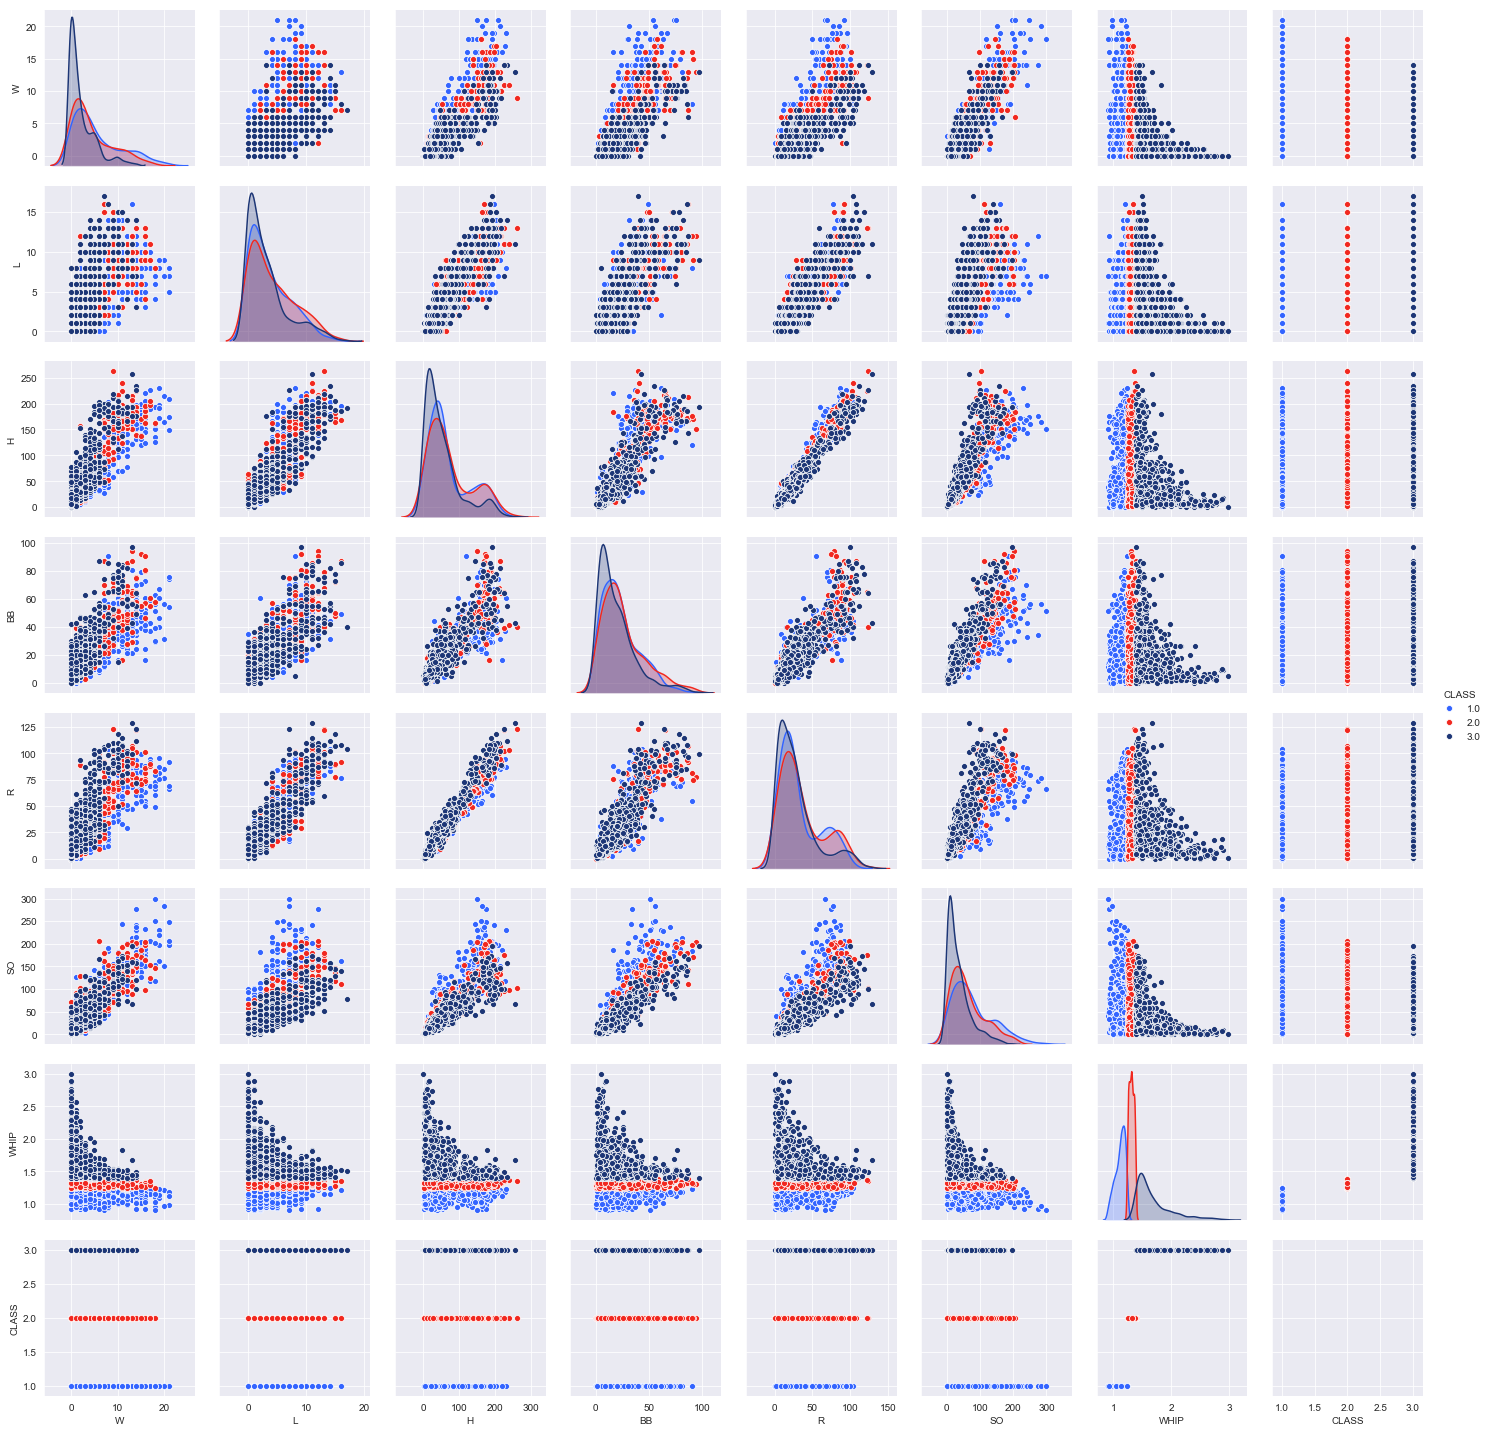

In [275]:
colors_ = ["#3364ff", "#f1281f", "#1d3676", "#3364ff", "#008000", "#9d1370"]
sns.set_palette(colors_)
sns.pairplot(best_teams[["W", "L", "H", "BB", "R", "SO", "WHIP", "CLASS"]], hue = 'CLASS', palette = sns.color_palette());

In [276]:
pitchers = ["kershcl01", "cahiltr01", "sabatcc01"]
player_perform = single_stint_df[single_stint_df["playerID"].isin(pitchers)].reset_index(drop = True)
player_perform.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,kershcl01,2008,1,LAN,NL,5,5,22,21,0,0,0,109,51,11,52,100,0,51,226.0,76.0,L,Clayton Kershaw,107.67,4.26,1.50,3.0
1,sabatcc01,2008,1,CLE,AL,17,10,35,35,10,5,0,223,76,19,59,251,0,85,300.0,78.0,L,CC Sabathia,253.00,2.70,1.11,1.0
2,cahiltr01,2009,1,OAK,AL,10,13,32,32,0,0,0,185,92,27,72,90,0,99,230.0,76.0,R,Trevor Cahill,178.67,4.63,1.44,3.0
3,kershcl01,2009,1,LAN,NL,8,8,31,30,0,0,0,119,53,7,91,185,1,55,226.0,76.0,L,Clayton Kershaw,171.00,2.79,1.23,1.0
4,sabatcc01,2009,1,NYA,AL,19,8,34,34,2,1,0,197,86,18,67,197,0,96,300.0,78.0,L,CC Sabathia,230.00,3.37,1.15,1.0


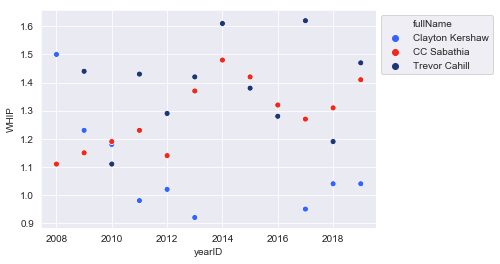

In [277]:
sns.scatterplot(x = "yearID", y = "WHIP", data = player_perform, hue = "fullName")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [278]:
single_stint_df_NoObj = single_stint_df.drop(columns = ["playerID", "teamID",
                                                        "lgID","stint", "throws", "fullName", "CLASS"])
single_stint_df_NoObj.head()

,yearID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,IP,ERA,WHIP
0,2008,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,48.67,5.55,1.73
1,2008,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,12.33,6.57,1.54
2,2008,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,30.00,2.40,1.17
3,2008,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,53.00,3.57,1.40
4,2008,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,65.33,2.48,1.04


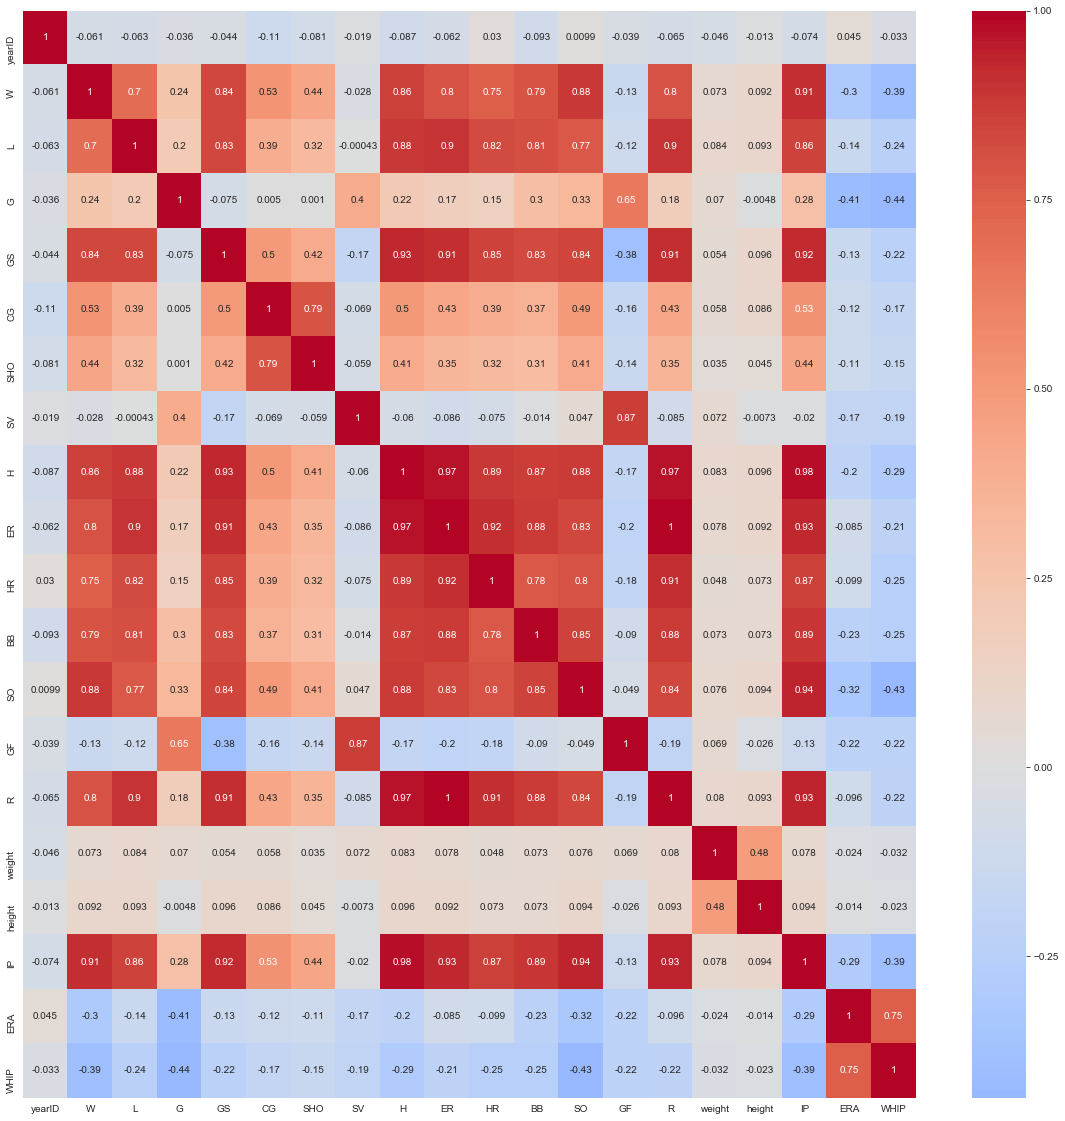

In [280]:
plt.figure(figsize = (20, 20))
sns.set_style("darkgrid")
sns.heatmap(single_stint_df_NoObj.corr(), center = 0, annot = True, cmap = "coolwarm")

In [281]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score